In [1]:
import pandas as pd
from collections import Counter
import glob
import numpy as np
import re
import seaborn as sns
from scipy import stats
import umap.umap_ as umap

In [2]:
import matplotlib
matplotlib.rcParams["svg.fonttype"] = "none"
matplotlib.rcParams["text.usetex"] = False
import matplotlib.pyplot as plt

In [3]:
path_model ='../outputs/bedembed_output/starspace_model_hg19.tsv'

In [4]:
label_prefix='__label__'

In [5]:
def label_preprocessing(path_label_embedding, label_prefix, common_labels=[]):
    labels = []
    label_vectors = []
    label_embedding = pd.read_csv(path_label_embedding, sep = '\t', header = None, skiprows=1)
    vectors = label_embedding[label_embedding[0].str.contains(label_prefix)]#.reset_index()
    
    vectors[0] = vectors[0].str.replace(label_prefix, '')

    if(len(common_labels)>0):
        vectors = vectors[vectors[0].isin(common_labels)]

    return vectors[list(vectors)[1:]].values, list(vectors[0])

In [6]:

# This function reduce the dimension using umap and plot 
def UMAP_plot(data_X, y, title = '', nn = 100, metric = 'cosine', filename = '', plottitle = '', output_folder = ''):

    np.random.seed(3)
    dp = 400
#     y = []
#     for i in range(int(len(data_X)/200)):
#         y.extend(200*['region'+str(i)])
        
    
    ump = umap.UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False,  learning_rate=0.9,
     local_connectivity=1.0, low_memory=False, metric=  metric,
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=1000,
     n_neighbors=nn, negative_sample_rate=3, output_metric='euclidean',
     output_metric_kwds=None, random_state=3, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=3, unique=False, verbose=False)

    ump.fit(data_X) 
    ump_data = pd.DataFrame(ump.transform(data_X)) 


    ump_data = pd.DataFrame({'UMAP 1':ump_data[0],
                            'UMAP 2':ump_data[1],
                            title:y})
    
    ump_data = ump_data.sort_values(by = title)

#     fig, ax = plt.subplots(figsize=(10,10))
    print('hi')
    plate =(sns.color_palette("husl", n_colors=len(set(y))))
    kind='scatter'
#     fig, ax = plt.subplots(figsize=(10, 10))
    fig = ump_data.plot(kind =kind,  x='UMAP 1', y='UMAP 2', rot = 45, fontsize=15, s=500, title=title, color= plate, figsize=(10,10), legend = True)
    print(type(fig))
    
#     sns.scatterplot(x="UMAP 1", y="UMAP 2", hue=title, s = 400, ax= ax, palette = plate,

#                 sizes=(10, 10),
#                   data=ump_data, #.sort_values(by = title),
#                     rasterized=True,)
#                    legend = False)

    # Put a legend to the right of the current axis
#     plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize =  15, markerscale=2, edgecolor = 'black')
    
    for i, txt in enumerate(list(ump_data[title])):
        fig.annotate(txt, (ump_data.iloc[i]["UMAP 1"]-0.05, ump_data.iloc[i]["UMAP 2"]+0.05))
#     plt.legend(loc='upper right', )

    

    
    return fig

In [7]:
from scipy.cluster import hierarchy

In [8]:
nn = 5
target='target'
common_labels = []
label_vectors, labels = label_preprocessing(glob.glob(path_model.format(target))[0], label_prefix, common_labels)
ump = umap.UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False,  learning_rate=0.9,
     local_connectivity=1.0, low_memory=False, metric=  'cosine',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=1000,
     n_neighbors=nn, negative_sample_rate=3, output_metric='euclidean',
     output_metric_kwds=None, random_state=3, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=3, unique=False, verbose=False)

ump.fit(label_vectors) 
ump_data = pd.DataFrame(ump.transform(label_vectors)) 



/home/eg8qe/.conda/envs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


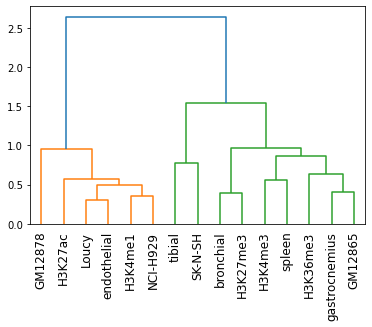

In [10]:
Z = hierarchy.linkage(ump_data,'weighted')
hierarchy.dendrogram(Z, labels=labels, leaf_rotation = 90)
# plt.savefig('./figures/dendogram_target.svg', format = 'svg', bbox_inches  = 'tight')
plt.show()#['h3k4me3', 'h3k4me2', 'h3k4me1', 'h3k27ac', 'h3k9ac',  'h4k20me1', 'h3k9me1', 'h3k79me2']

In [11]:
nn=5

hi
<class 'matplotlib.axes._subplots.AxesSubplot'>
CPU times: user 772 ms, sys: 5.03 ms, total: 777 ms
Wall time: 811 ms


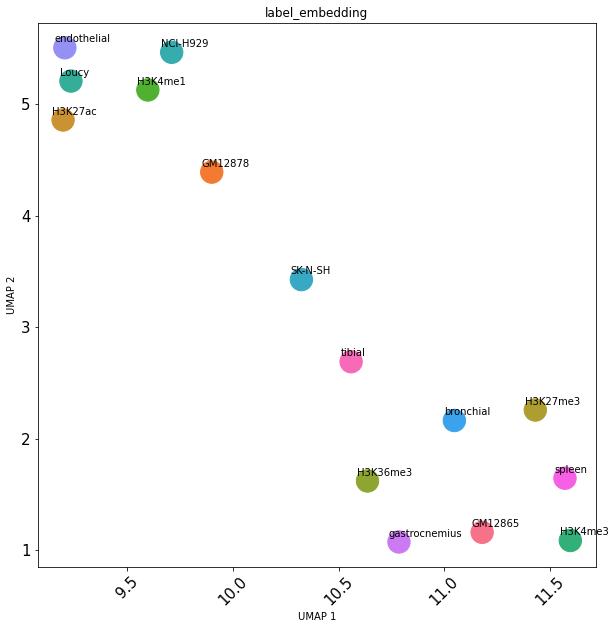

In [12]:
%%time
target='target'
common_labels = []
# label_vectors, labels = label_preprocessing(glob.glob(path_model.format(target))[0], label_prefix, common_labels)
# nn = 3
fig = UMAP_plot(label_vectors, labels, title = 'label_embedding', metric = 'cosine', nn = nn, filename = '', plottitle = 'Label Embedding', output_folder = './')
# fig.figure.savefig('./figures/label_emebdding_{}.svg'.format(target), format = 'svg', bbox_inches = 'tight', dpi= 400)